In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [3]:
# 2. Load Data
df = pd.read_csv("college_student_placement_dataset.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
# 3. Exploratory Data Analysis (EDA)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None
Placement
No     0.8341
Yes    0.1659
Name: proportion, dtype: float64


In [ ]:
print(df.describe())

                 IQ  Prev_Sem_Result          CGPA  Academic_Performance  \
count  10000.000000     10000.000000  10000.000000          10000.000000   
mean      99.471800         7.535673      7.532379              5.546400   
std       15.053101         1.447519      1.470141              2.873477   
min       41.000000         5.000000      4.540000              1.000000   
25%       89.000000         6.290000      6.290000              3.000000   
50%       99.000000         7.560000      7.550000              6.000000   
75%      110.000000         8.790000      8.770000              8.000000   
max      158.000000        10.000000     10.460000             10.000000   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  
count            10000.000000          10000.000000        10000.000000  
mean                 4.970900              5.561800            2.513400  
std                  3.160103              2.900866            1.715959  
min                

In [7]:
print(df["Placement"].value_counts(normalize=True))

Placement
No     0.8341
Yes    0.1659
Name: proportion, dtype: float64


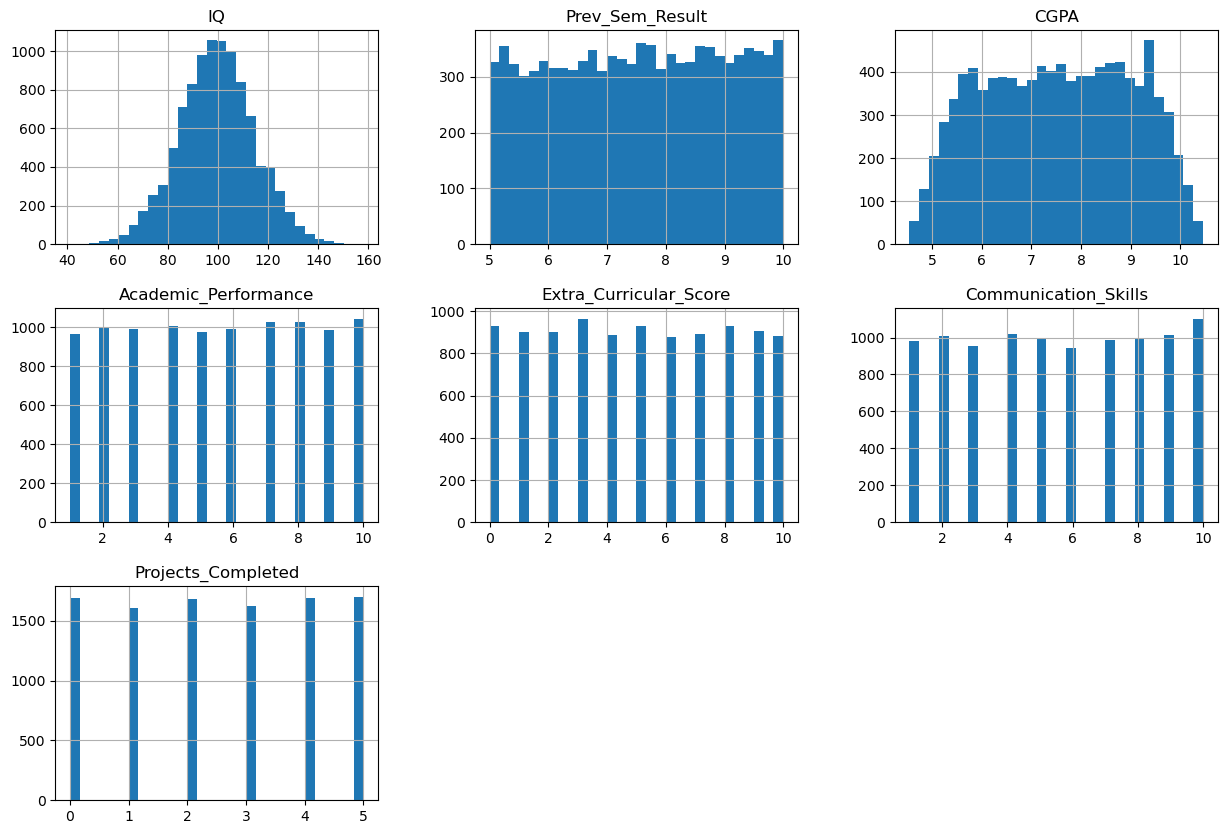

In [8]:
# Distribution of numeric features
df.hist(bins=30, figsize=(15,10))
plt.show()


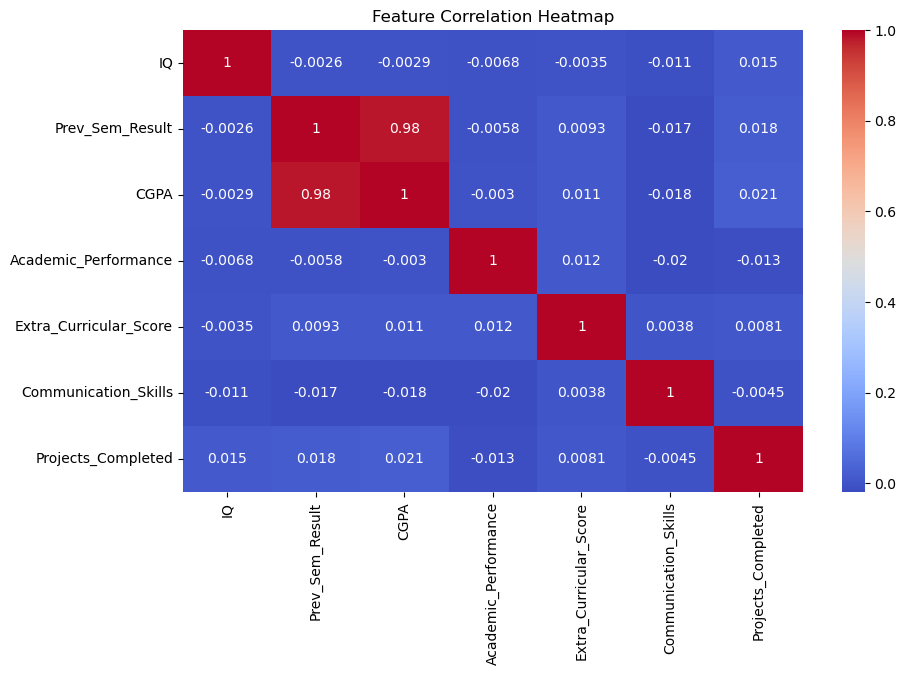

In [10]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


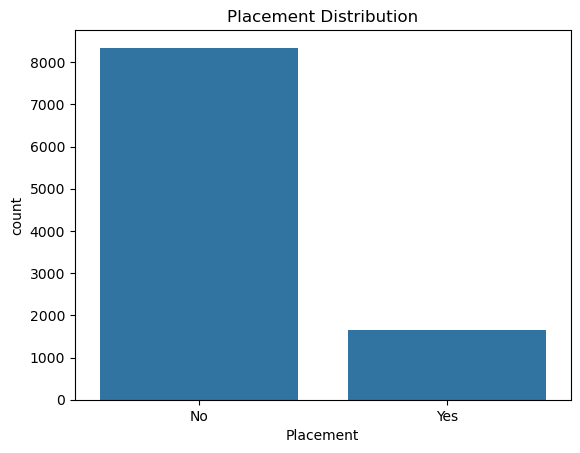

In [11]:
# Placement counts
sns.countplot(x="Placement", data=df)
plt.title("Placement Distribution")
plt.show()

In [12]:
# 4. Data Preprocessing

# Drop College_ID (not useful for prediction)
df = df.drop("College_ID", axis=1)

# Encode categorical variables
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features and Target
X = df.drop("Placement", axis=1)
y = df["Placement"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# 6. Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# 7. Model Evaluation
y_pred = rf.predict(X_test)

print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Performance
Accuracy: 0.999
Precision: 1.0
Recall: 0.9939759036144579
F1-score: 0.9969788519637462

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      0.99      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



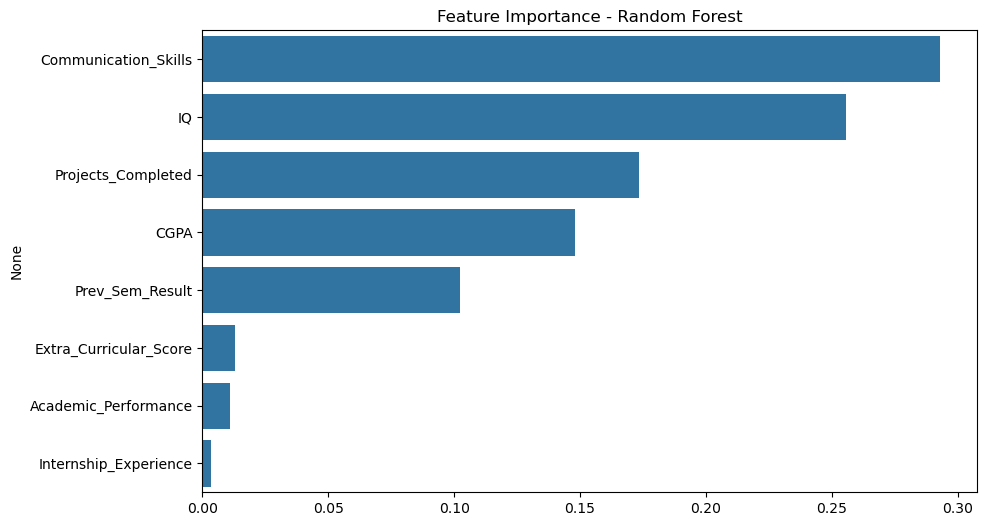

In [16]:
# 8. Feature Importance
feature_importances = rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx])
plt.title("Feature Importance - Random Forest")
plt.show()

In [ ]:
# 9. Hyperparameter Tuning
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [18]:
# Evaluate tuned model
y_pred_tuned = best_rf.predict(X_test)
print("Tuned Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1-score:", f1_score(y_test, y_pred_tuned))

Tuned Random Forest Performance
Accuracy: 0.999
Precision: 1.0
Recall: 0.9939759036144579
F1-score: 0.9969788519637462


In [ ]:
#predicting the new student from the given values 
# Example new student data (change values as needed)
new_data = pd.DataFrame([{
    "IQ": 110,
    "Prev_Sem_Result": 8.2,
    "CGPA": 8.5,
    "Academic_Performance": 9,
    "Internship_Experience": "Yes",
    "Extra_Curricular_Score": 7,
    "Communication_Skills": 8,
    "Projects_Completed": 3
}])

# Encode categorical variable using same encoding
new_data["Internship_Experience"] = LabelEncoder().fit(["No","Yes"]).transform(new_data["Internship_Experience"])

# Scale using the same scaler fitted earlier
new_data_scaled = scaler.transform(new_data)

# Predict placement
prediction = best_rf.predict(new_data_scaled)
prediction_proba = best_rf.predict_proba(new_data_scaled)

print("Prediction (0=No, 1=Yes):", prediction[0])
print("Prediction Probability:", prediction_proba)


Prediction (0=No, 1=Yes): 1
Prediction Probability: [[0.05352778 0.94647222]]


In [20]:
#optional
# =========================
# 10. Baseline Models Comparison
# =========================

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_tuned))


Logistic Regression Accuracy: 0.9035
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 0.999
